In [ ]:
import pandas as pd

In [6]:
data = pd.read_csv("weather_forecast_data.csv")

In [7]:
data

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [8]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (2500, 6)


In [9]:
print(data.head())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None


In [11]:
print(data.describe())

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

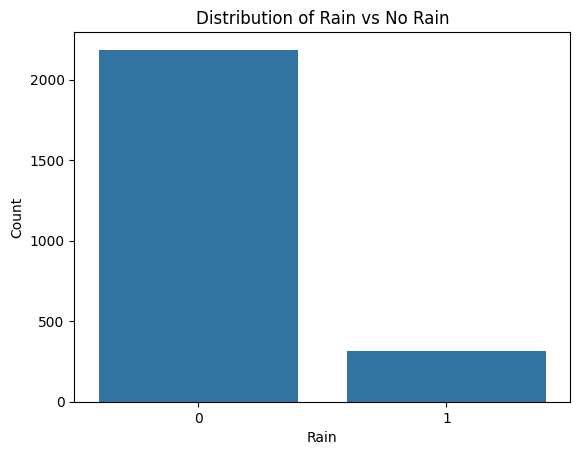

In [27]:
sns.countplot(x='Rain', data=data)
plt.title('Distribution of Rain vs No Rain')
plt.xlabel('Rain')
plt.ylabel('Count')
plt.show()

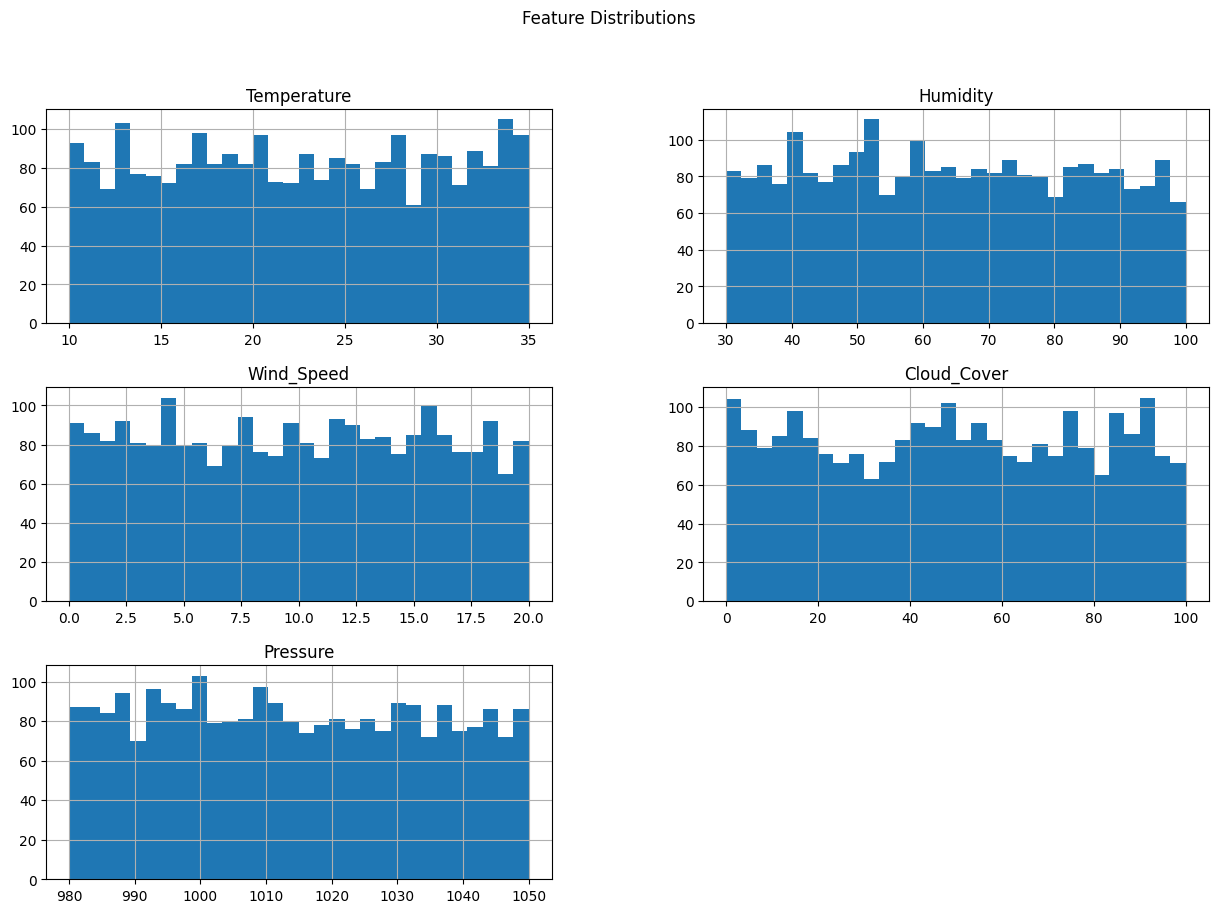

In [15]:
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

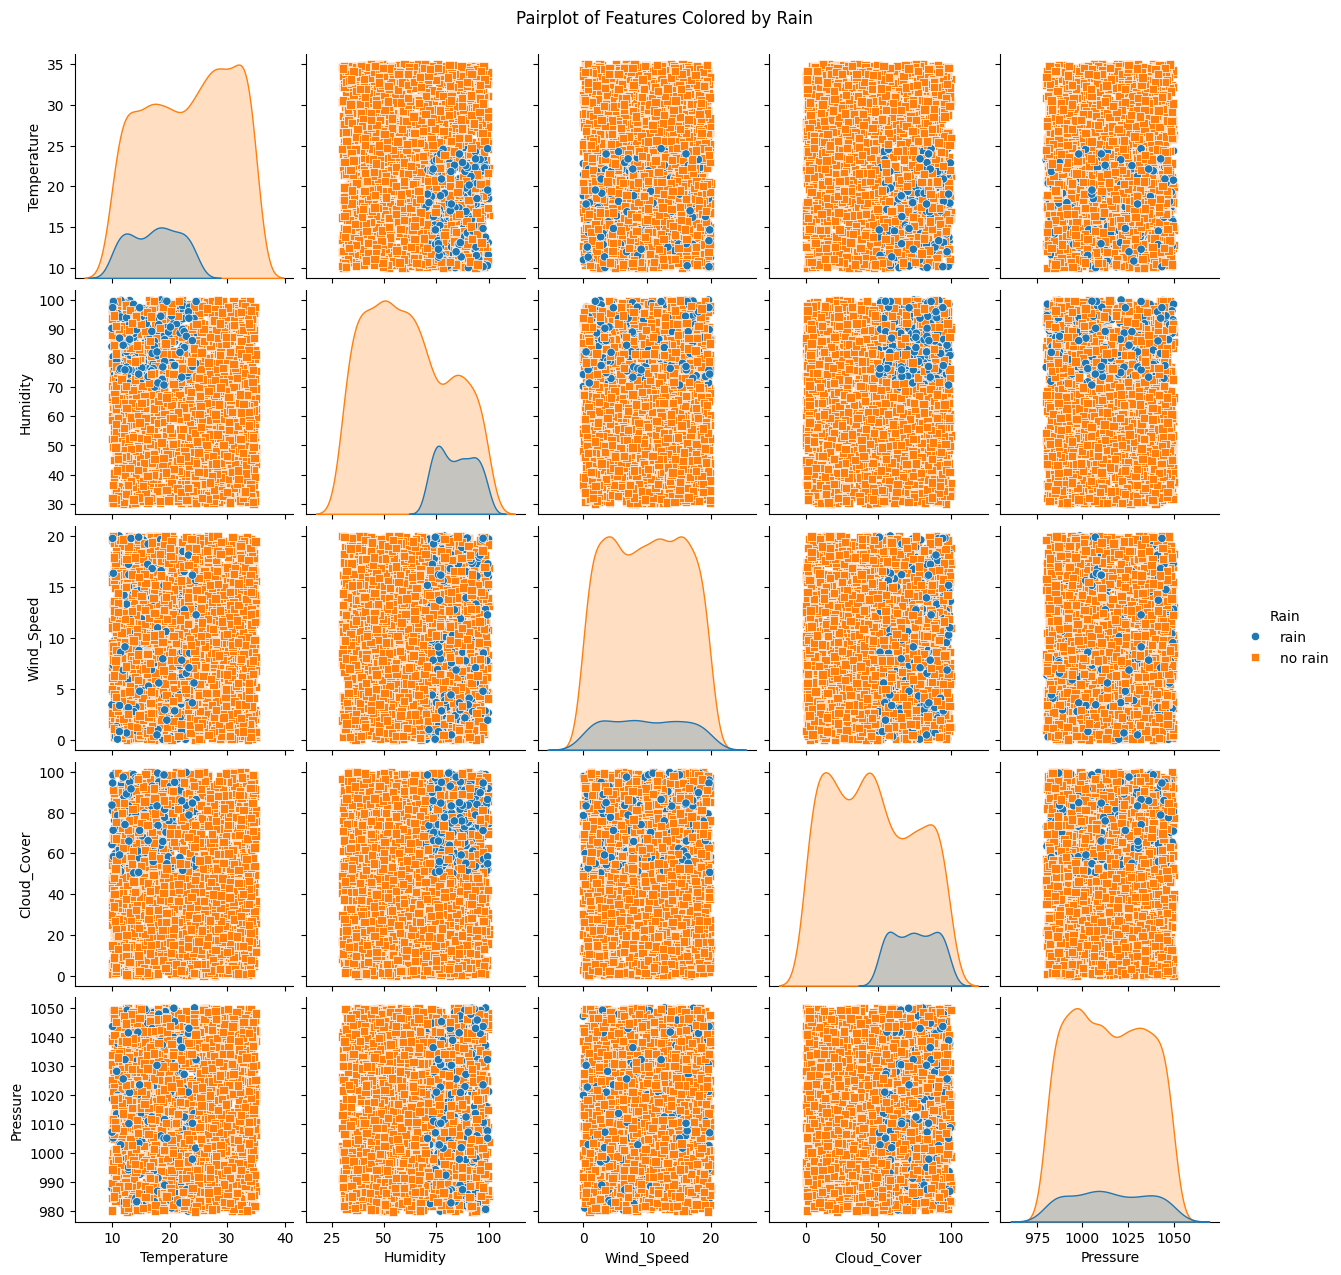

In [16]:
sns.pairplot(data, hue='Rain', markers=["o", "s"])
plt.suptitle('Pairplot of Features Colored by Rain', y=1.02)
plt.show()

In [20]:
label_encoder = LabelEncoder()
data['Rain'] = label_encoder.fit_transform(data['Rain'])

In [21]:
correlation_matrix = data.corr(numeric_only=True)

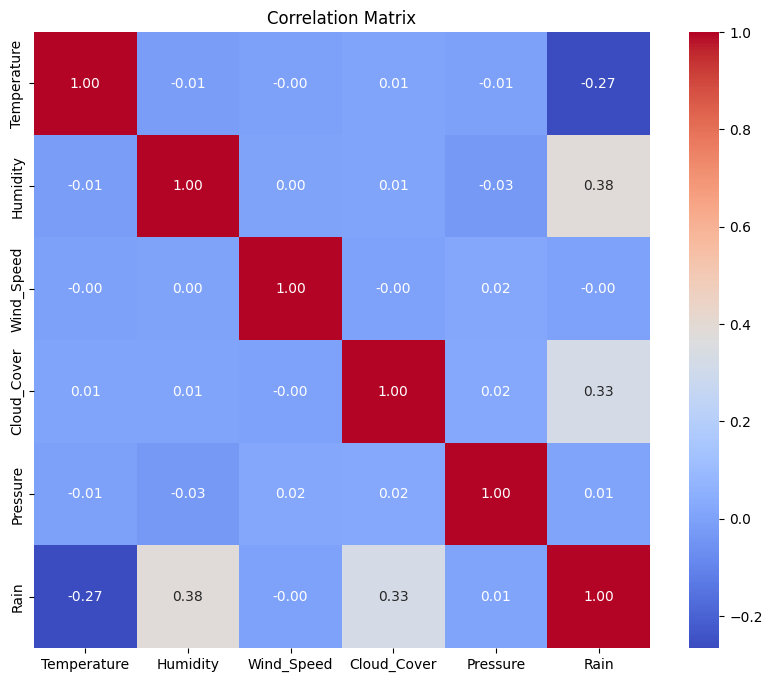

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

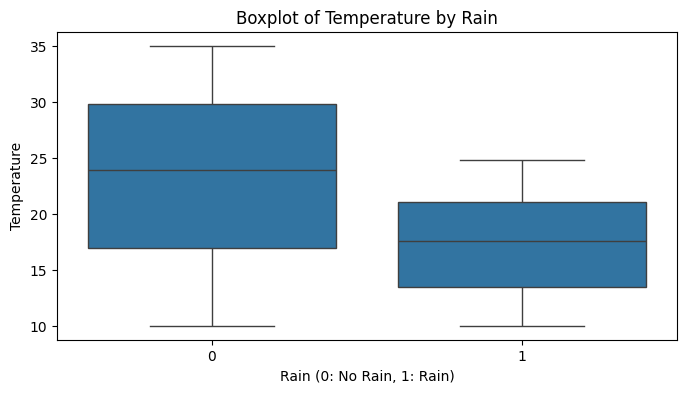

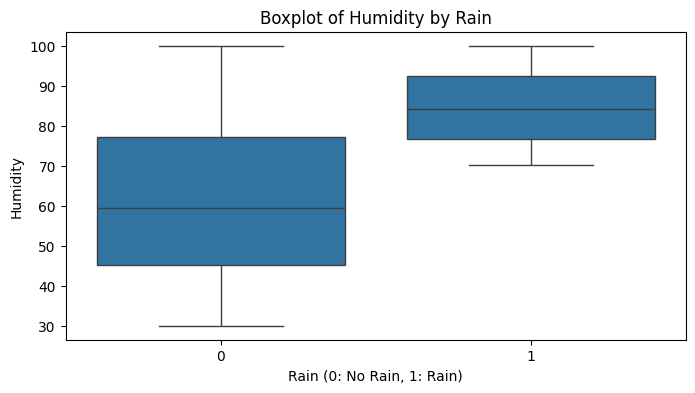

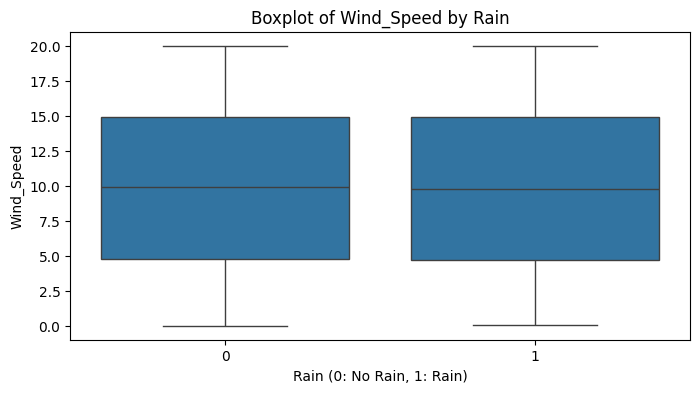

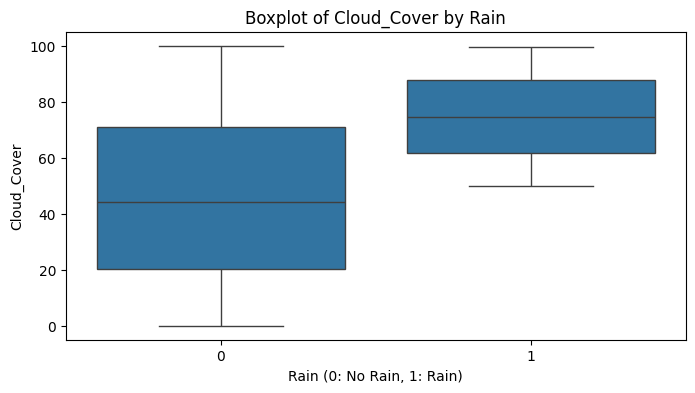

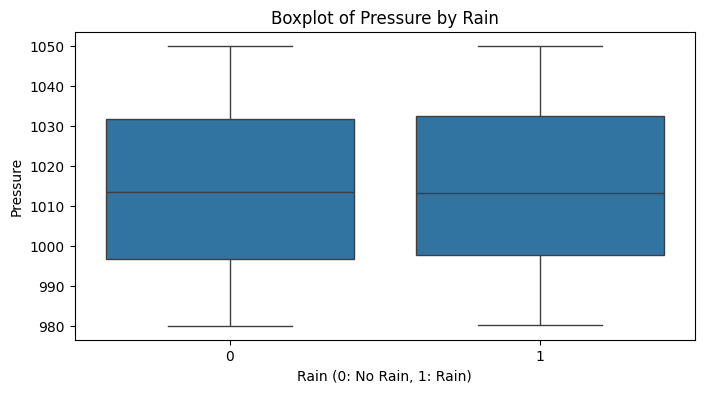

In [33]:
features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Rain', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Rain')
    plt.xlabel('Rain (0: No Rain, 1: Rain)')
    plt.ylabel(feature)
    plt.show()

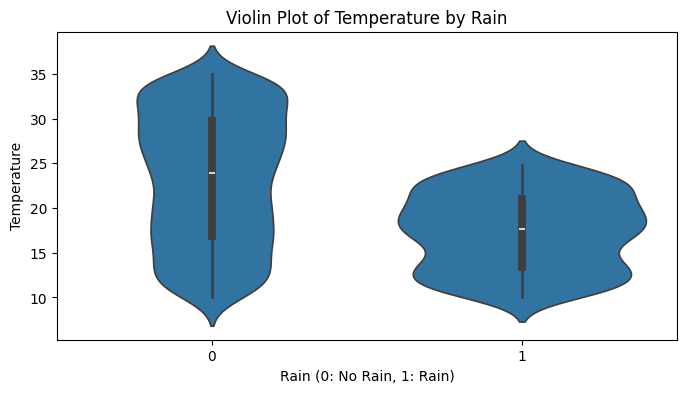

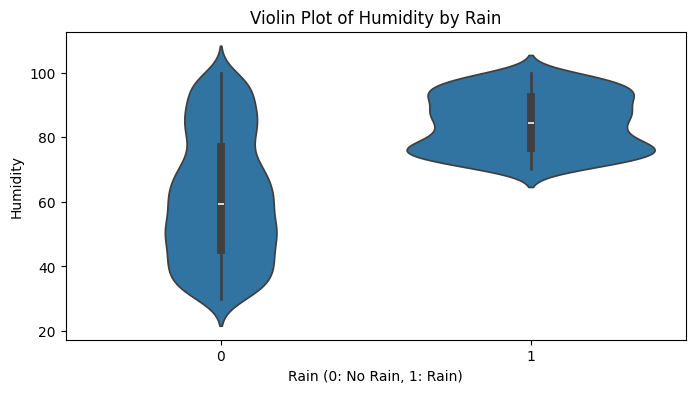

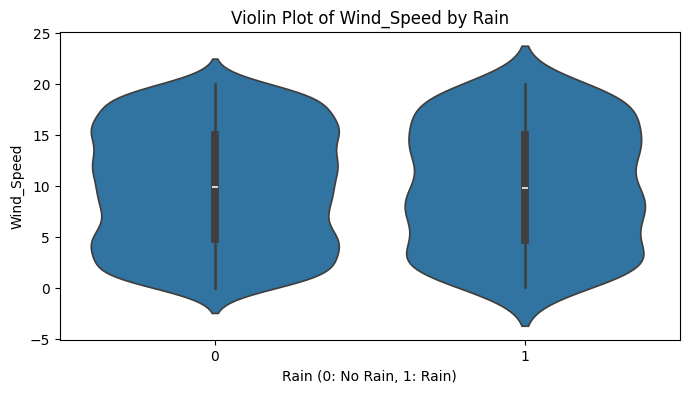

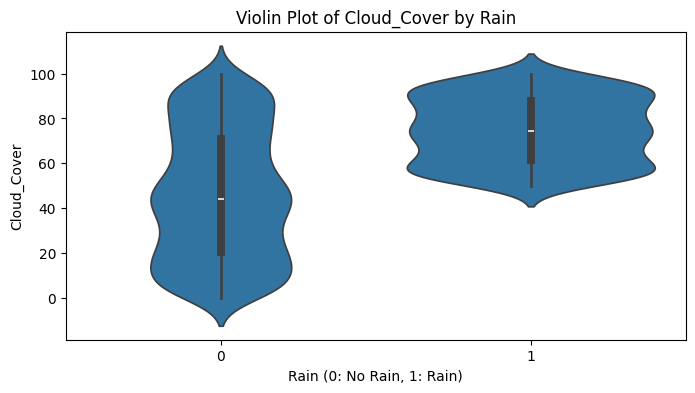

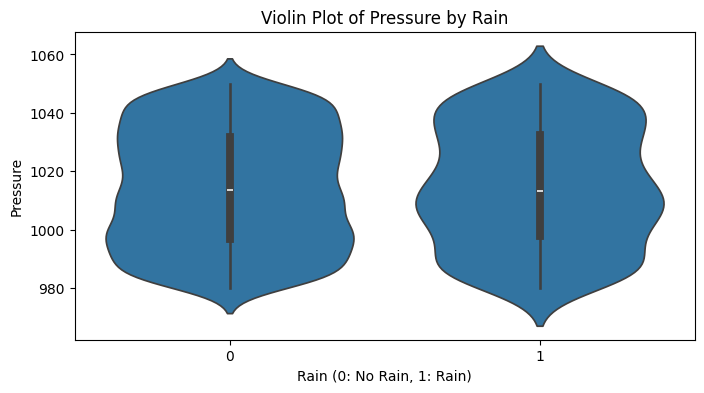

In [34]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Rain', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} by Rain')
    plt.xlabel('Rain (0: No Rain, 1: Rain)')
    plt.ylabel(feature)
    plt.show()

In [23]:
X = data.drop('Rain', axis=1)  # Features
y = data['Rain']   

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [32]:
def predict_rainfall(temperature, humidity, wind_speed, cloud_cover, pressure):
    input_data = [[temperature, humidity, wind_speed, cloud_cover, pressure]]
    prediction = rf_model.predict(input_data)
    return "Rain" if prediction[0] == 1 else "No Rain"

temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
wind_speed = float(input("Enter Wind Speed: "))
cloud_cover = float(input("Enter Cloud Cover: "))
pressure = float(input("Enter Pressure: "))

result = predict_rainfall(temperature, humidity, wind_speed, cloud_cover, pressure)
print("Prediction:", result)

Prediction: Rain


C:\Users\Joshoua.Simon\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
